In [14]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [4]:
# read in dataframe
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

In [8]:
# creating list of VClass car sizes in order
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# creates vclasses, an ordered list of categorical variables, sedan_classes
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
# sets VClass column to categorical variable
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [12]:
# confirm change of VClass to categorical variable
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
id           3929 non-null int64
make         3929 non-null object
model        3929 non-null object
year         3929 non-null int64
VClass       3929 non-null category
drive        3929 non-null object
trans        3929 non-null object
fuelType     3929 non-null object
cylinders    3929 non-null int64
displ        3929 non-null float64
pv2          3929 non-null int64
pv4          3929 non-null int64
city         3929 non-null float64
UCity        3929 non-null float64
highway      3929 non-null float64
UHighway     3929 non-null float64
comb         3929 non-null float64
co2          3929 non-null int64
feScore      3929 non-null int64
ghgScore     3929 non-null int64
dtypes: category(1), float64(6), int64(8), object(5)
memory usage: 587.3+ KB


Text(0, 0.5, 'Displacement (l)')

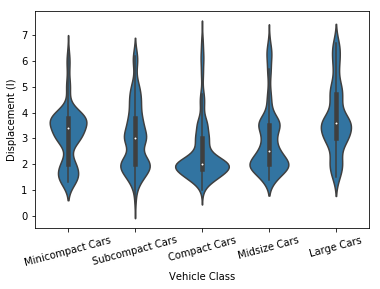

In [23]:
# getting one base color so plots aren't rainbow
base_color = sns.color_palette()[0]
# violin plot of categorical vehicle class by size of engine
sns.violinplot(data = fuel_econ,
              x = 'VClass',
              y = 'displ',
              color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Vehicle Class');
plt.ylabel('Displacement (l)')